# Factor Analysis and Cluster Analysis
* Matteo Facchetti
* Mario Damiano Russo 
* Mirko Frigerio

Here you can find an example of how to perform Factor Analysis and Cluster Analysis with Python. I will present a few exercises and the solution that my team has come up with.

For these exercises, please refer to the dataset `wines_properties.csv` inside the Data folder.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1---Principal-Component-Analysis" data-toc-modified-id="Exercise-1---Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1 - Principal Component Analysis</a></span></li><li><span><a href="#Exercise-2---Hierarchical-Cluster-Algorithm" data-toc-modified-id="Exercise-2---Hierarchical-Cluster-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2 - Hierarchical Cluster Algorithm</a></span></li><li><span><a href="#Exercise-3---K-means-Cluster-Analysis" data-toc-modified-id="Exercise-3---K-means-Cluster-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 3 - K-means Cluster Analysis</a></span></li><li><span><a href="#Exercise-4---Writing-a-function-that-performs-the-Cluster-Analysis" data-toc-modified-id="Exercise-4---Writing-a-function-that-performs-the-Cluster-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 4 - Writing a function that performs the Cluster Analysis</a></span></li><li><span><a href="#Exercise-5---Writing-a-function-that-performs-the-PCA" data-toc-modified-id="Exercise-5---Writing-a-function-that-performs-the-PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 5 - Writing a function that performs the PCA</a></span></li></ul></div>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [15]:
%cd "/home/matteo/Documenti/Documenti Università/Data Science/Statistica/Assignment2/"

/home/matteo/Documenti/Documenti Università/Data Science/Statistica/Assignment2


In [16]:
wine_properties = pd.read_csv("wines_properties.csv")
wine_properties.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

## Exercise 1 - Principal Component Analysis
Perform a Principal Component Analysis, analyzing the meaning of the first two principal components using the "circle of correlations".

`Customer_Segment` is a categorical variable, therefore we will exclude it to perform the PCA.

In [17]:
wine_properties = wine_properties.iloc[:, :-1]
wine_properties.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

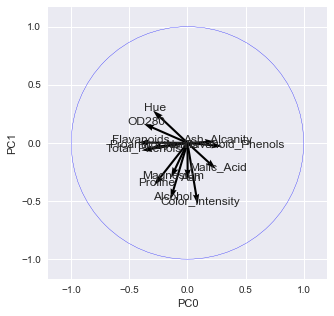

In [18]:
# Let's standardize our data first
wine_properties_s = StandardScaler().fit_transform(wine_properties)

# Compute covariance matrix and its eigenvalues
cov_matrix = pd.DataFrame(np.cov(wine_properties_s, rowvar = False))
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Pair eigenvalues and eigenvectors and sort them based on eigenvalues
eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                        for i in range(len(eig_vals)) ]
eigen_vecs_vals.sort()
eigen_vecs_vals.reverse()

# Use the two largest obtained PCs to compute the correlation circle
PCs2 = np.array([eigen_vecs_vals[0][1], eigen_vecs_vals[1][1]])
PCs2
Y = wine_properties_s.dot(PCs2.T)

# Generate the basic plot
fig = plt.figure(figsize = (5, 5))
plt.quiver(np.zeros(PCs2.shape[1]), np.zeros(PCs2.shape[1]),
           PCs2[0,:], PCs2[1,:],
           angles='xy', scale_units='xy', scale=1)

# Add labels
circle_names = [wine_properties.columns[i] for i in range(PCs2.shape[1])]
for i, j, z in zip(PCs2[1,:]+0.02, PCs2[0,:]+0.02, circle_names):
    plt.text(j, i, z, ha='center', va='center')
    
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])

# Label axes
plt.xlabel('PC0')
plt.ylabel('PC1')

# Done
plt.show()

The circle of correlations shows the relationship between clusters. Positively correlated variables are grouped together and point in the same direction. We can se for example that variables Hue and OD280 are positively correlated. Negatively correlated variables are positioned on opposite sides of the plot origin, that is, on opposed quadrants. In our case, variables Flavanoids and Ash_Alcanity are negatively correlated.

## Exercise 2 - Hierarchical Cluster Algorithm

Use a hierarchical cluster algorithm to guess a likely number of clusters present in the data.

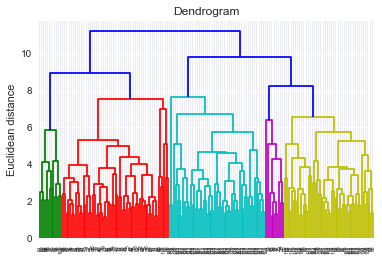

In [19]:
# Let's plot the dendrogram
dendrogram = dendrogram(linkage(wine_properties_s, method='complete', metric='euclidean'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distance');

3 is a plausible number of clusters.

## Exercise 3 - K-means Cluster Analysis

Use the previous number of clusters to perform a K-means cluster analysis:
* analyze the "silhouette" of the clusters;
* plot on the space of the first two dimensions of the PCA the clusters obtained with K-means, using a different color for each cluster.

In [20]:
km = KMeans(n_clusters = 3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-4)

In [21]:
wine_km = km.fit_predict(Y)
wine_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

We can see that each observation belongs to a cluster. We now analyze the "silhouette" to evaluate the goodness of each cluster.

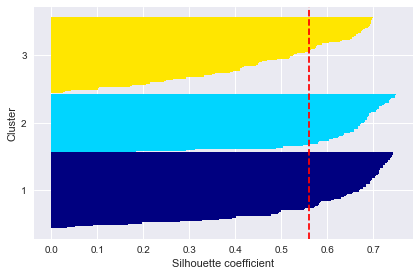

In [22]:
# Silhouette of the clusters
cluster_labels = np.unique(wine_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(Y, wine_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[wine_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. We can see that the average coefficient is between 0.5 and 0.6, which means that our objects match pretty well to their cluster. This means that 3 is a good number of clusters.

Let's now proceed with plotting the clusters.

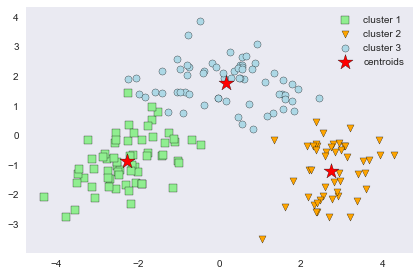

In [23]:
# Cluster 1
plt.scatter(Y[wine_km == 0, 0],
           Y[wine_km == 0, 1],
           s = 50, c="lightgreen",
           marker = 's', edgecolor = 'black',
           label = 'cluster 1')

# Cluster 2
plt.scatter(Y[wine_km == 1, 0],
           Y[wine_km == 1, 1],
           s = 50, c='orange',
           marker = 'v', edgecolor = 'black',
           label = 'cluster 2')

# Cluster 3
plt.scatter(Y[wine_km == 2, 0],
           Y[wine_km == 2, 1],
           s = 50, c='lightblue',
           marker = 'o', edgecolor = 'black',
           label = 'cluster 3')

# Centroids
plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*',
           c='red', edgecolor='black',
           label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

This plot confirms that our clusterization works properly: we can see three pretty well separated clusters.

## Exercise 4 - Writing a function that performs the Cluster Analysis

Write a function that takes in input the dataset and that returns:
1. the value of K (for the K-means) that is associated with the best overall silhouette of the K-means algorithm;
2. the plot of the correspondent clusters on the space of the first two dimensions of the PCA (performed over the same dataset).  

In [24]:
def kmns(df):
    from sklearn.metrics import silhouette_samples
    from matplotlib import cm
    from sklearn.preprocessing import StandardScaler
    averages = []
    df_s = StandardScaler().fit_transform(df)
    
    # Compute covariance matrix and its eigenvalues
    cov_matrix = pd.DataFrame(np.cov(df_s, rowvar = False))
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

    # Pair eigenvalues and eigenvectors and sort them based on eigenvalues
    eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                            for i in range(len(eig_vals)) ]
    eigen_vecs_vals.sort()
    eigen_vecs_vals.reverse()

    # Use the two largest obtained PCs to compute the correlation circle
    PCs2 = np.array([eigen_vecs_vals[0][1], eigen_vecs_vals[1][1]])
    PCs2
    Y = df_s.dot(PCs2.T)
    
    # Create a list containing the silhouette averages
    for i in range(2, df.shape[1]):
        km = KMeans(n_clusters = i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-4)
        data_km = km.fit_predict(Y)
        cluster_labels = np.unique(data_km)
        n_clusters = cluster_labels.shape[0]
        silhouette_vals = silhouette_samples(df_s, data_km, metric='euclidean')
        silhouette_avg = np.mean(silhouette_vals)
        averages.append(silhouette_avg)
    
    # The value of K is the value that maximizes the silhouette averages
    knumber = averages.index(max(averages)) + 2
    print("Value of K: {0}".format(knumber))
    
    # Plotting the clusters
    keymeans = KMeans(n_clusters = knumber)
    y_km = keymeans.fit_predict(Y)
    for i in range(knumber):
        plt.scatter(Y[y_km == i, 0], Y[y_km == i, 1],
                   s=50, edgecolor="black", label="cluster {0}".format(i+1))
    plt.scatter(keymeans.cluster_centers_[:, 0], keymeans.cluster_centers_[:, 1],
               s=250, marker='*', c='red', edgecolor='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()

Value of K: 3


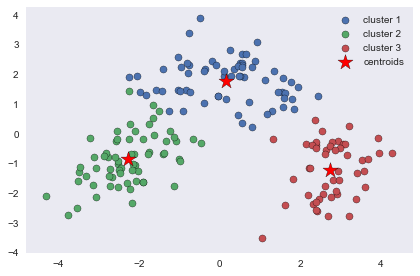

In [25]:
kmns(wine_properties)

The result is consistent with what we found manually in the previous exercise.

## Exercise 5 - Writing a function that performs the PCA

Write a function that takes in input the dataset: the function performs the PCA and returns the circle of correlations of each pair of principal components (1 and 2, 1 and 3, 1 and ..., 2 and 1, 2 and 3, ...).

In [26]:
def function(df):
    df_s = pd.DataFrame(StandardScaler().fit_transform(df))
    
    # Compute covariance matrix and its eigenvalues
    cov_matrix = pd.DataFrame(np.cov(df_s, rowvar = False))
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

    # Pair eigenvalues and eigenvectors and sort the based on eigenvalues
    eigen_vecs_vals = [ ( np.abs(eig_vals[i]), eig_vecs[:, i] ) 
                            for i in range(len(eig_vals)) ]
    eigen_vecs_vals.sort()
    eigen_vecs_vals.reverse()

    # Use the two largest obtained PCs to compute the correlation circle
    for h in range(len(eigen_vecs_vals)):
        for e in range(len(eigen_vecs_vals)):
            if h == e:
                continue
            else:
                PCs = np.array([eigen_vecs_vals[h][1], eigen_vecs_vals[e][1]])

                # Generate the basic plot
                fig = plt.figure(figsize = (5, 5))
                plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
                           PCs[0,:], PCs[1,:],
                           angles='xy', scale_units='xy', scale=1)

                # Add labels
                circle_names = [df.columns[i] for i in range(PCs.shape[1])]
                for i, j, z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, circle_names):
                    plt.text(j, i, z, ha='center', va='center')

                # Add unit circle
                circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
                plt.gca().add_artist(circle)

                # Ensure correct aspect ratio and axis limits
                plt.axis('equal')
                plt.xlim([-1.2,1.2])
                plt.ylim([-1.2,1.2])

                # Label axes
                plt.xlabel("PC" + str(h))
                plt.ylabel("PC" + str(e))

                # Done
                plt.show()

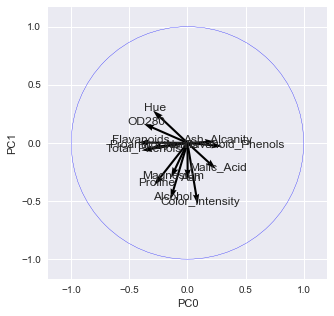

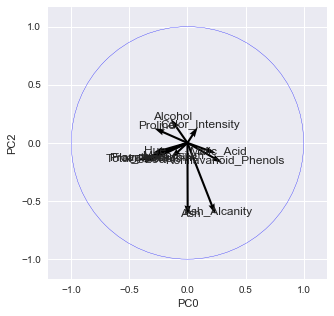

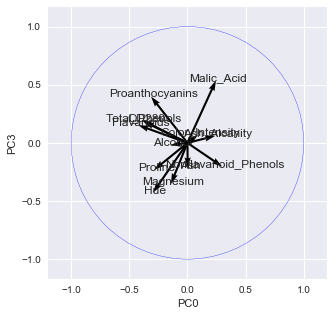

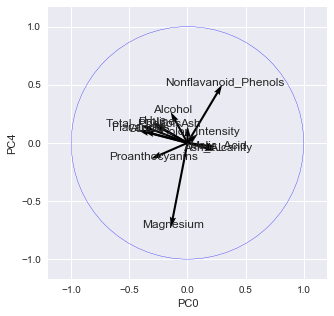

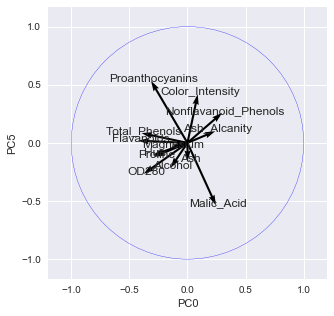

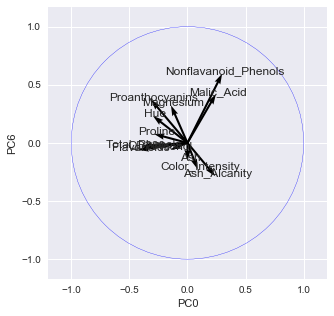

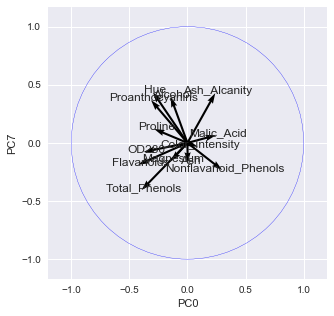

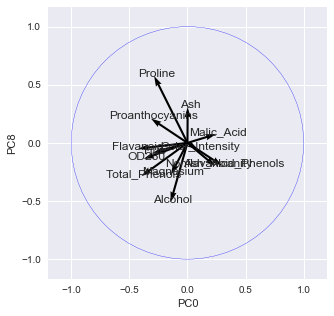

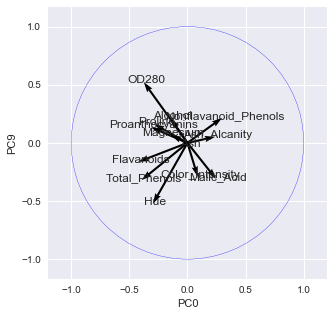

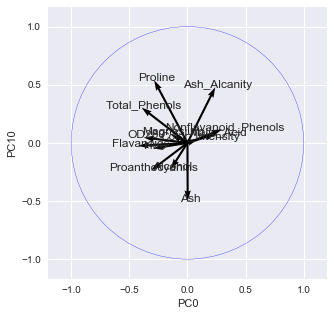

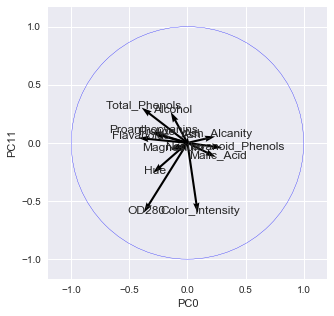

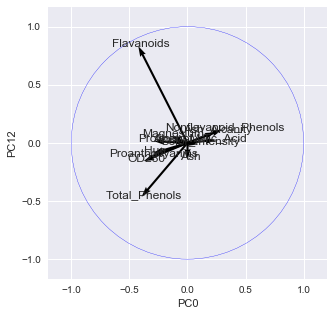

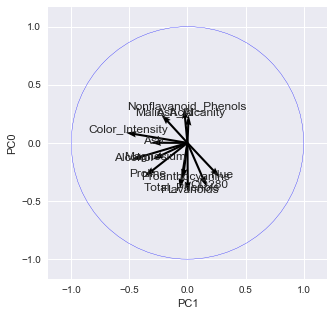

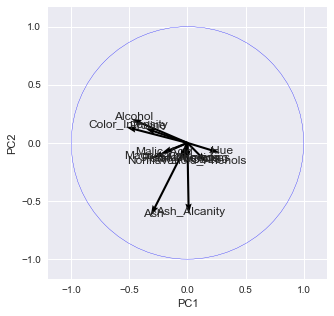

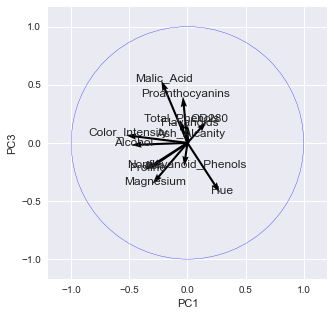

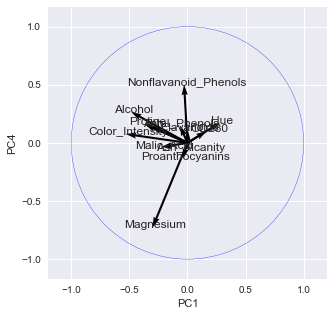

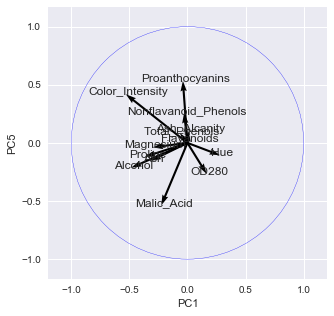

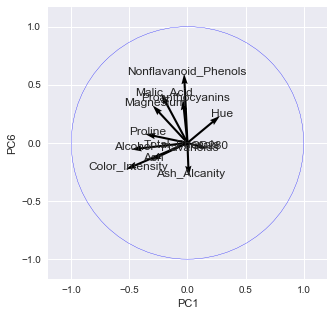

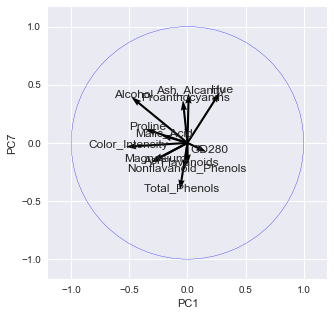

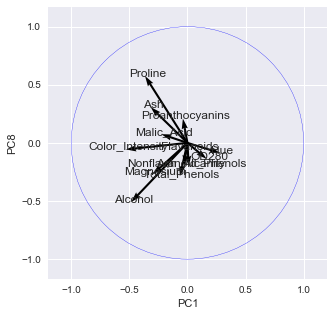

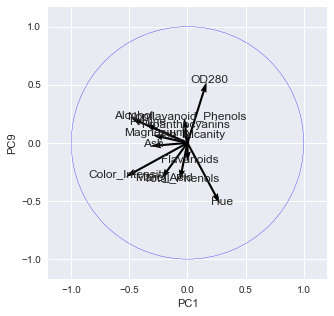

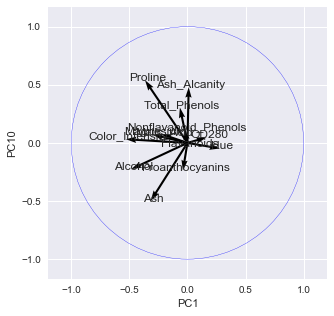

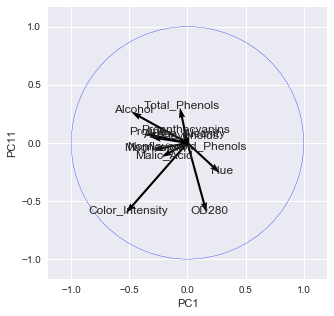

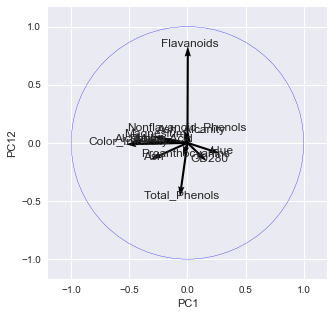

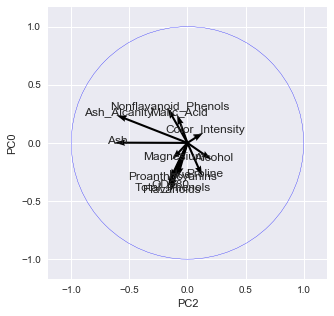

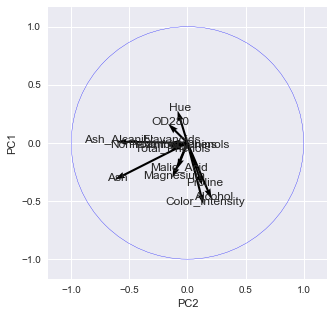

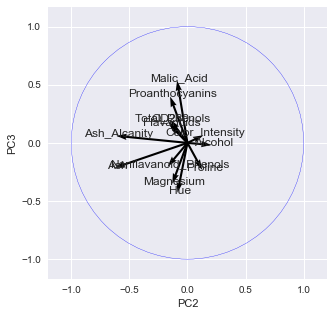

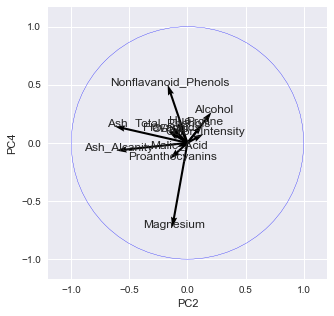

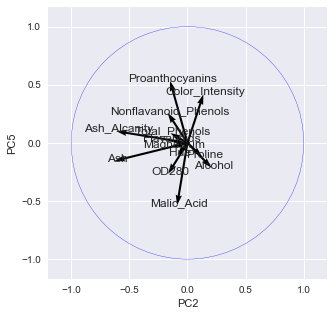

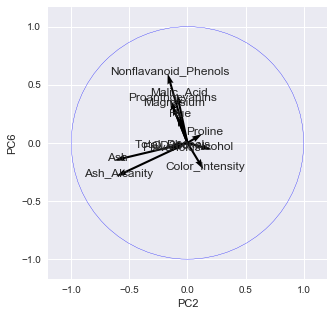

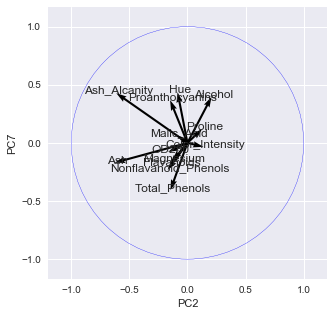

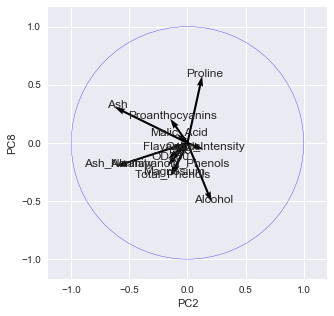

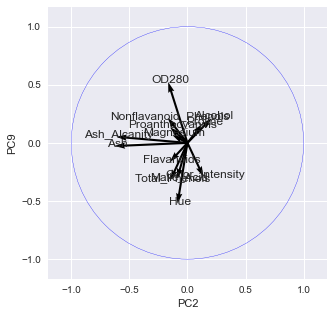

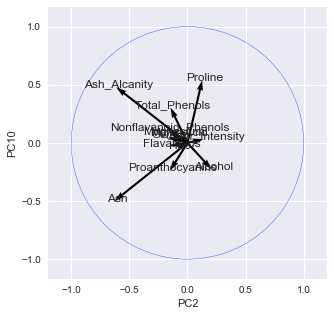

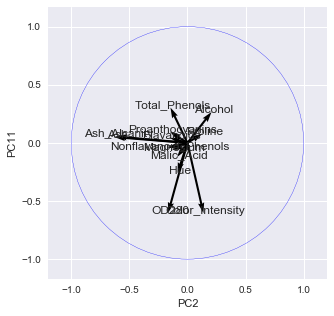

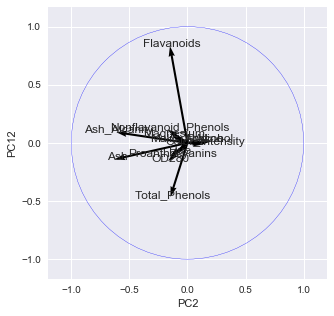

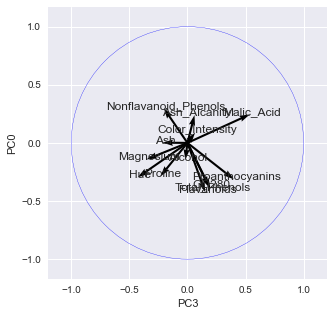

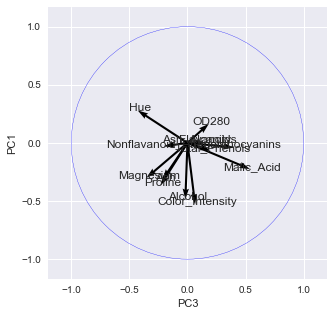

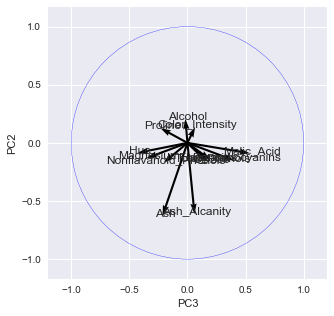

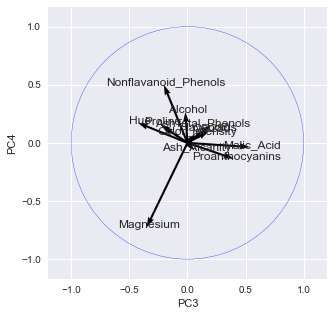

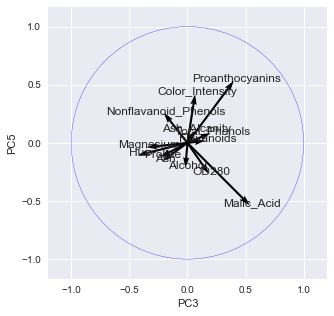

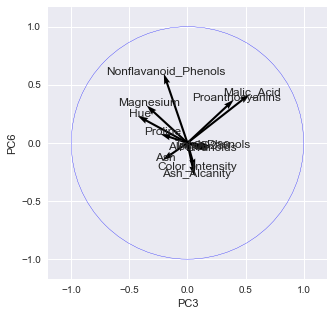

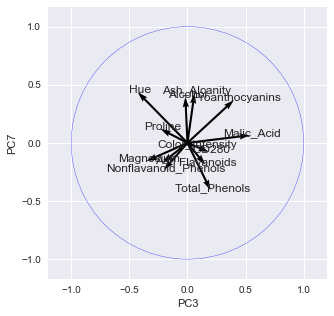

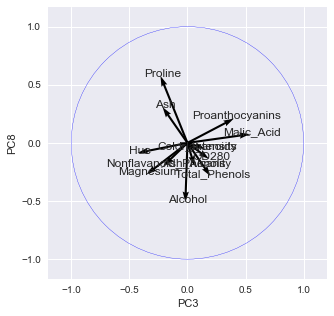

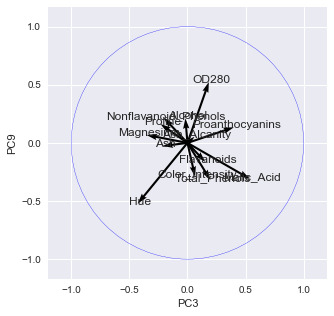

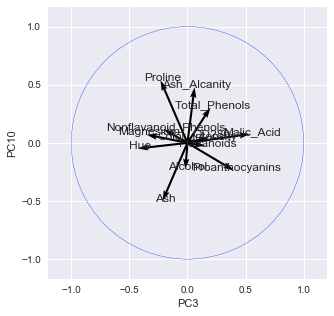

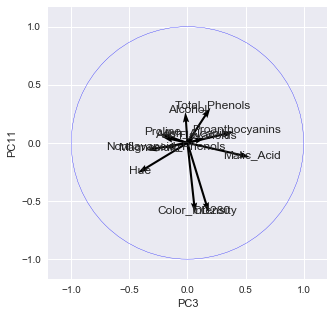

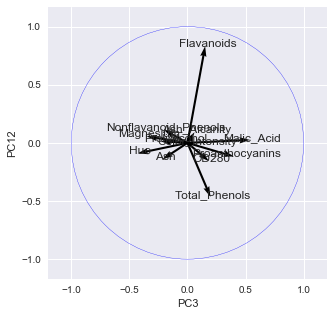

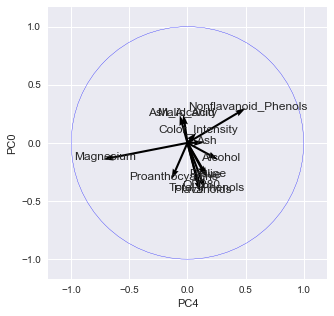

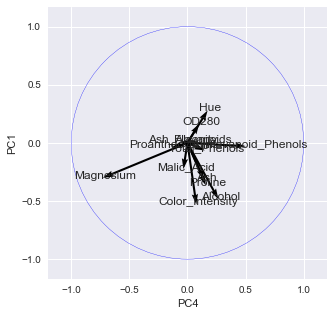

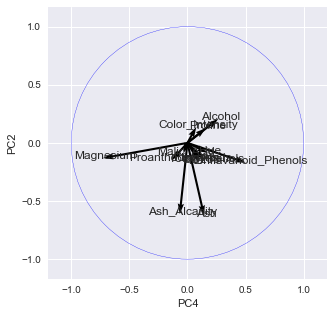

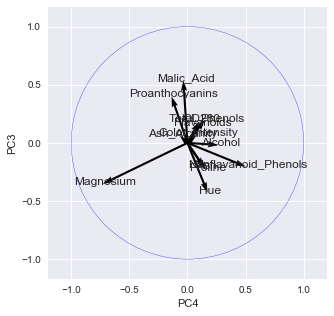

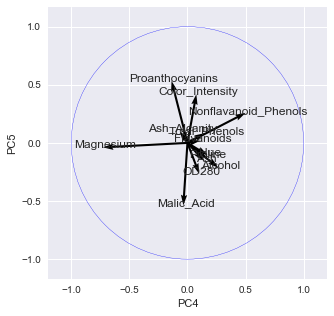

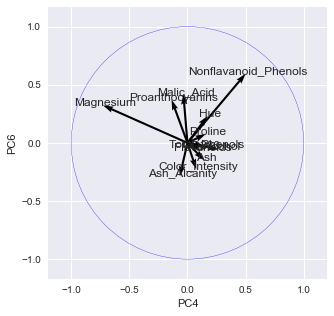

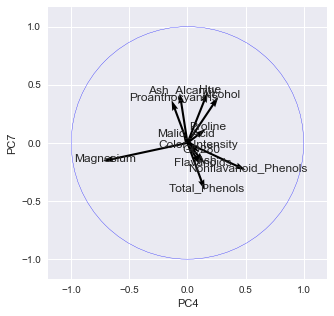

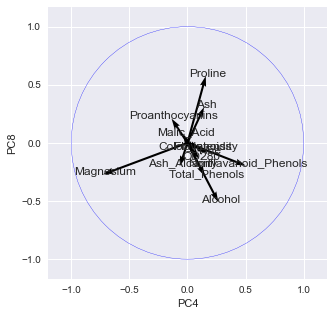

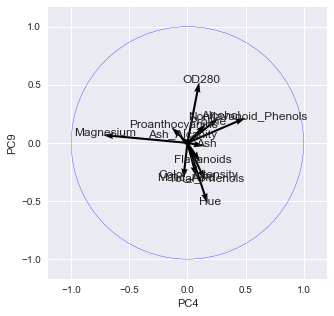

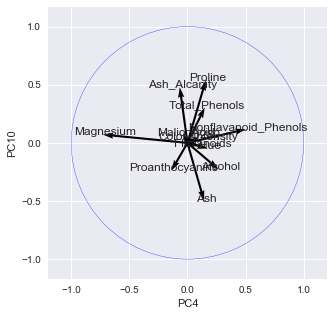

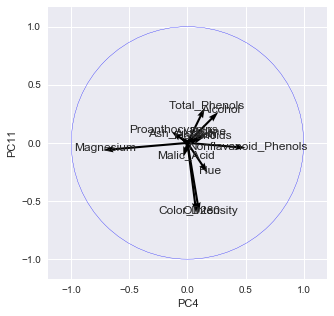

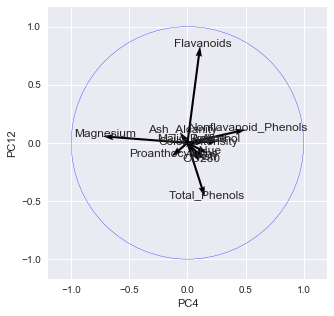

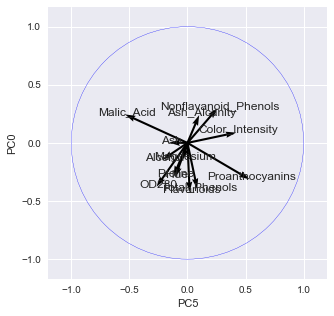

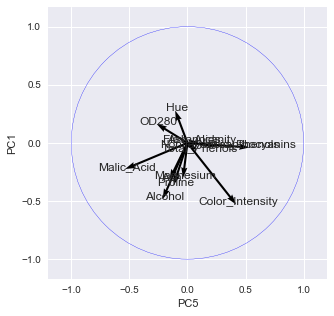

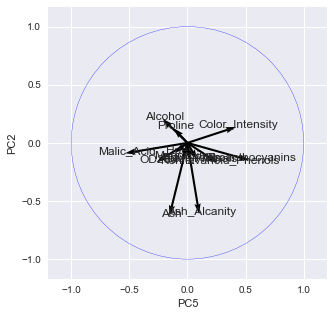

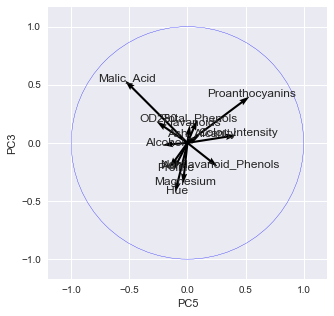

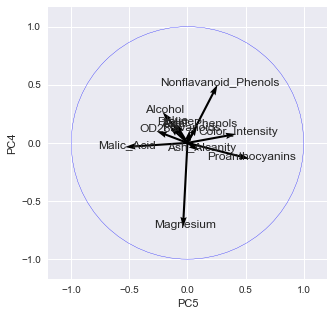

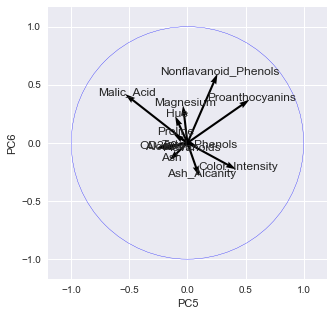

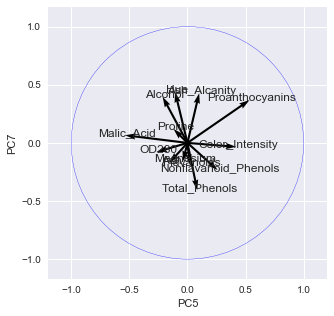

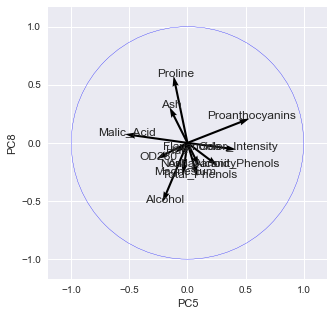

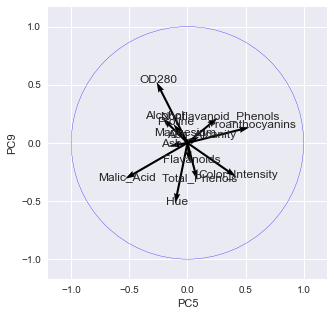

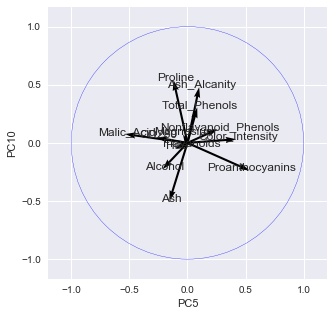

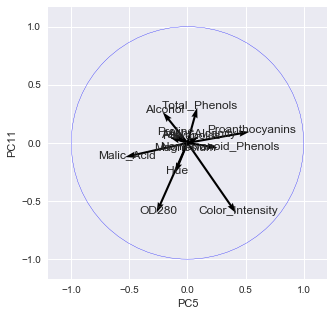

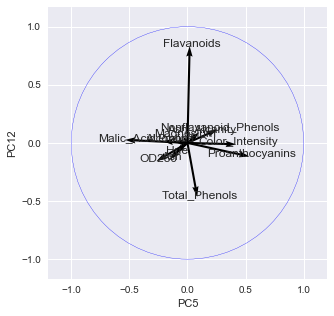

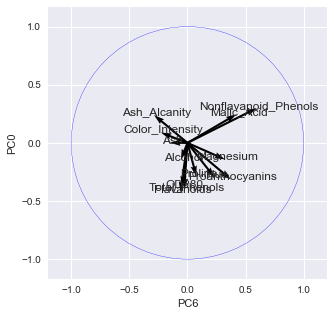

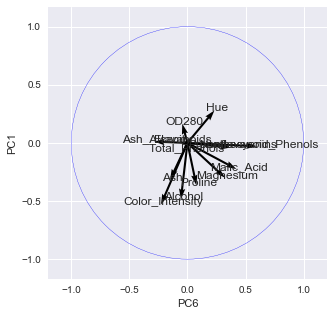

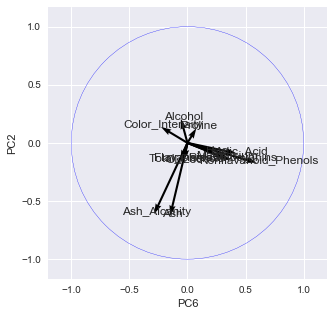

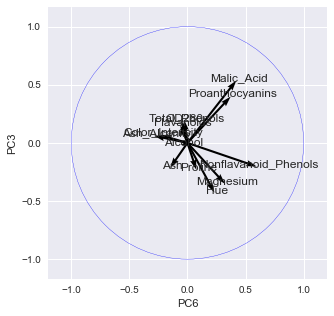

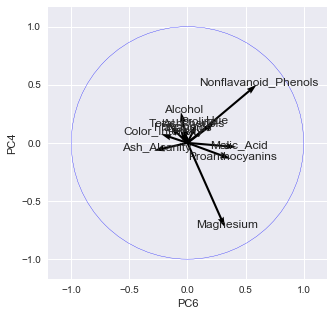

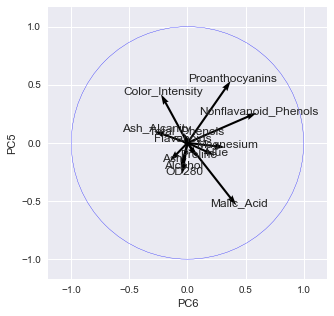

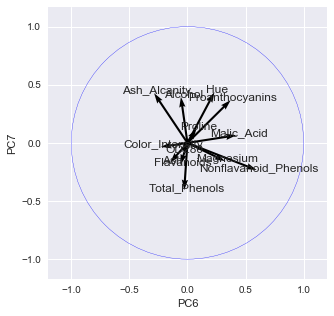

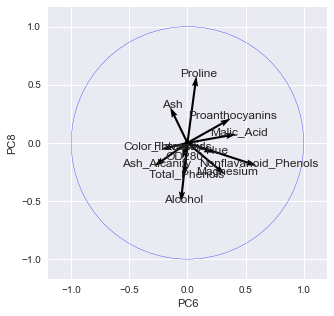

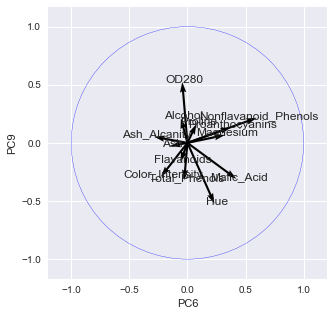

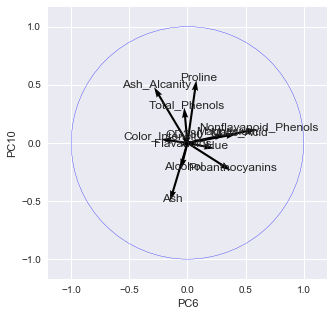

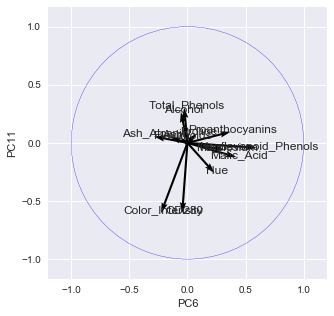

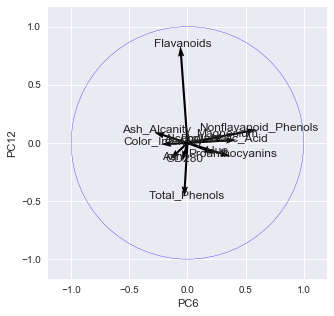

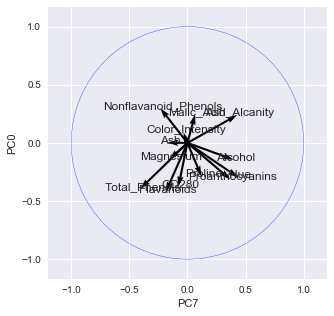

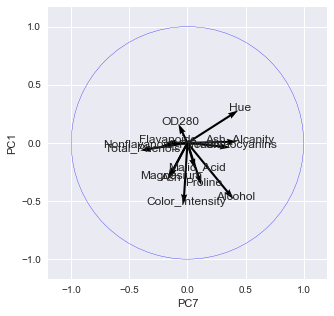

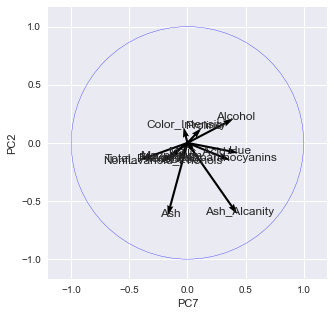

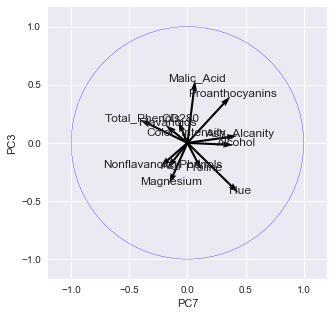

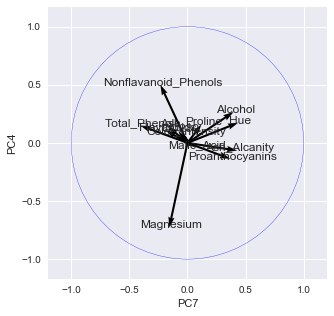

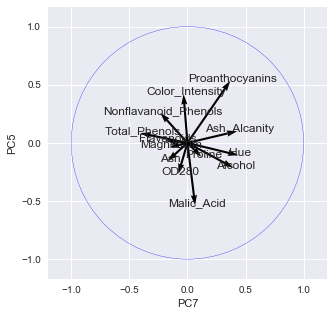

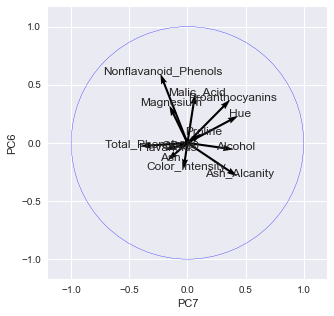

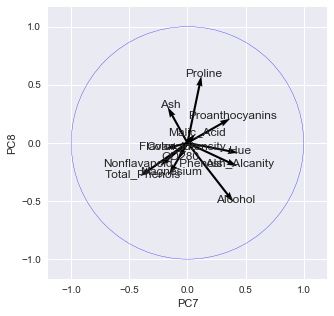

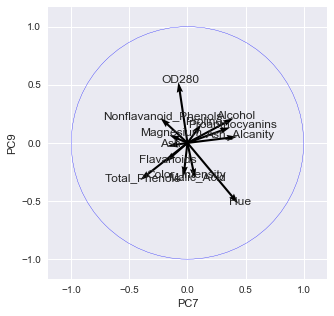

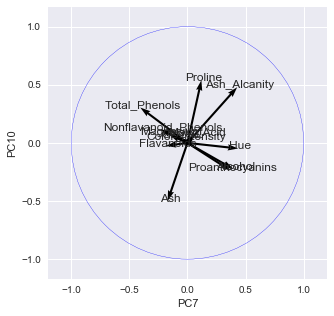

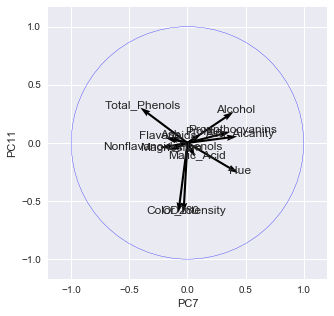

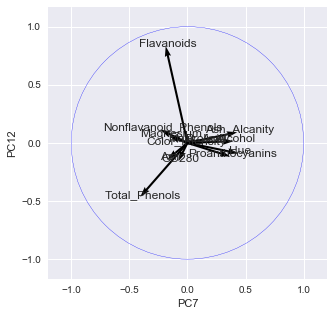

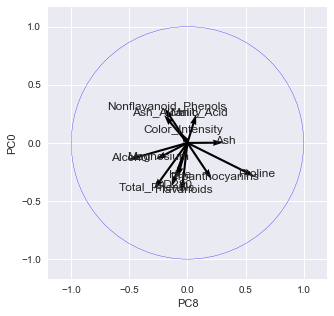

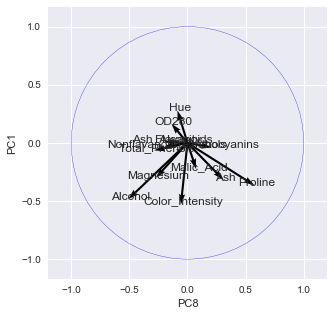

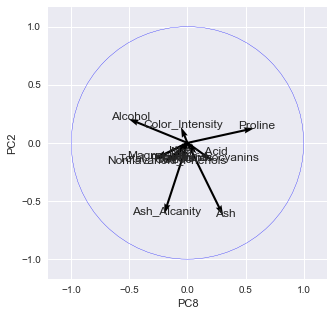

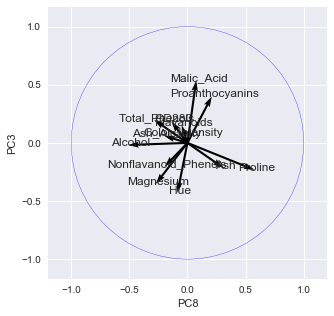

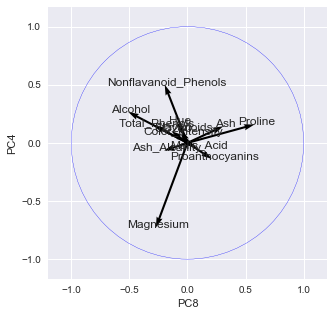

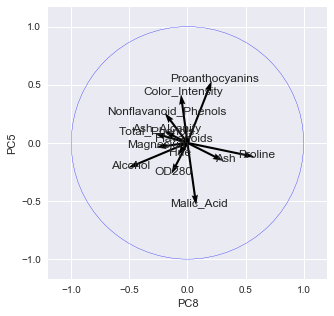

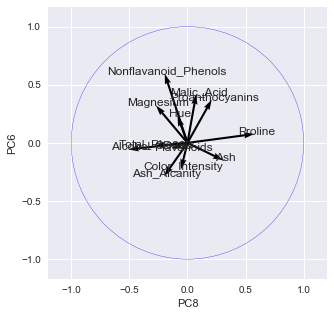

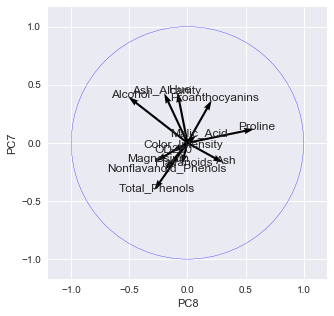

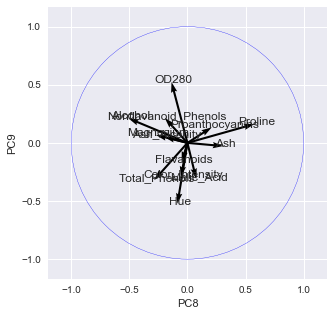

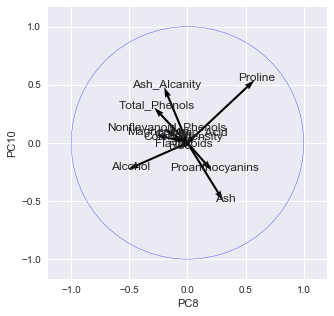

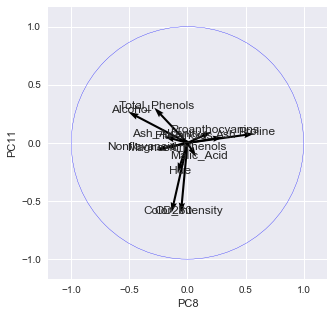

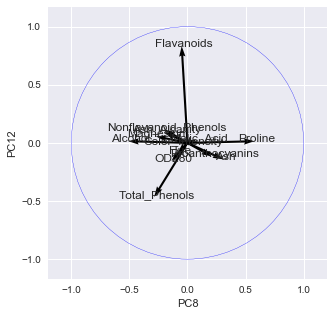

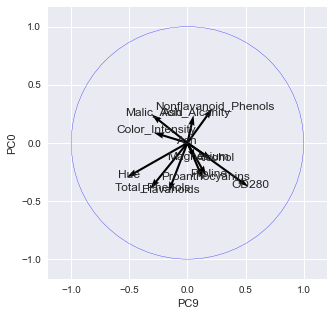

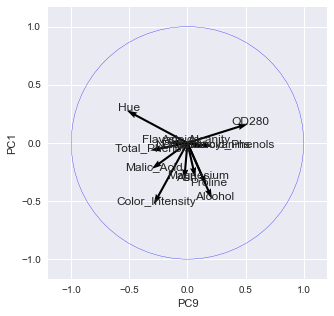

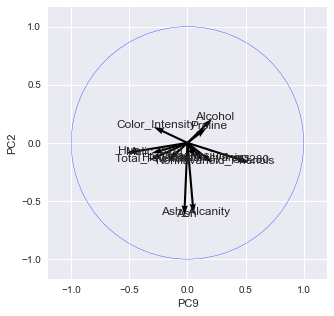

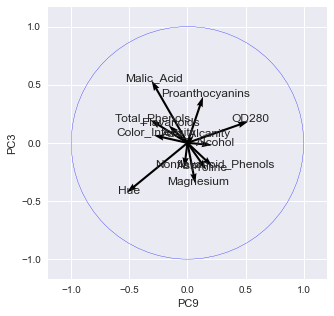

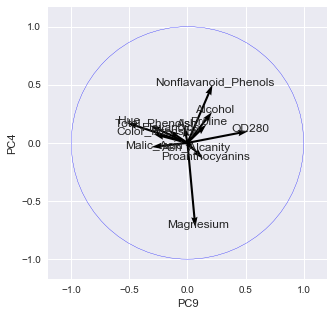

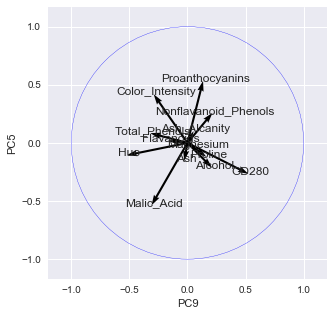

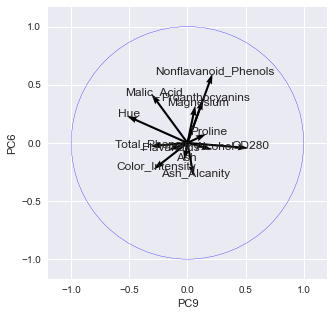

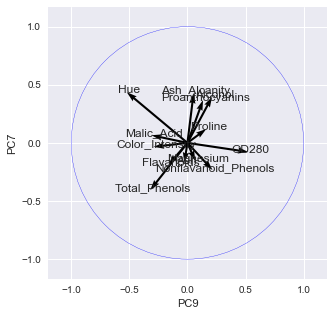

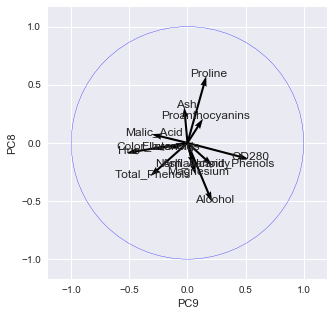

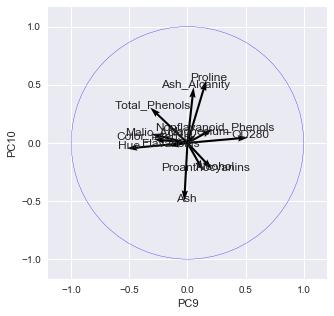

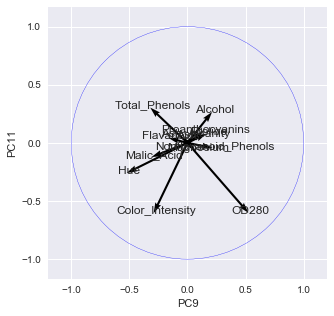

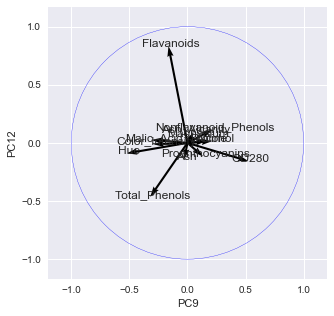

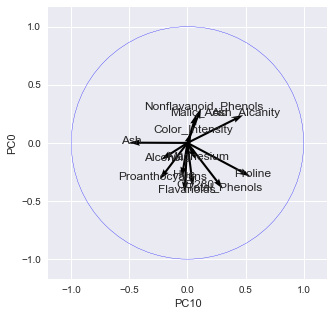

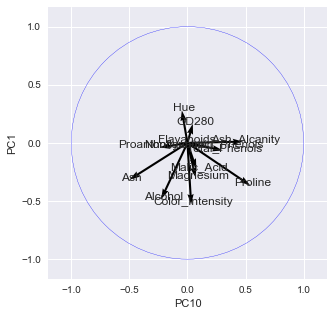

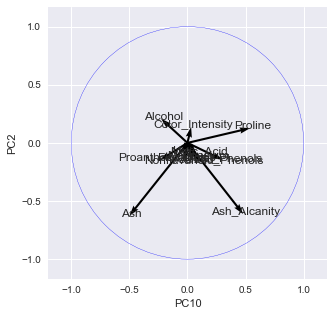

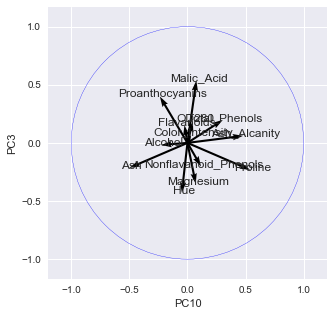

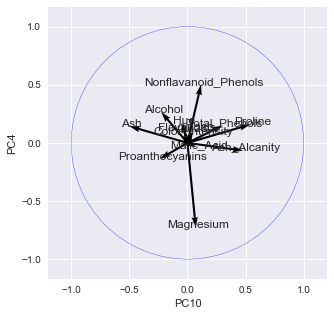

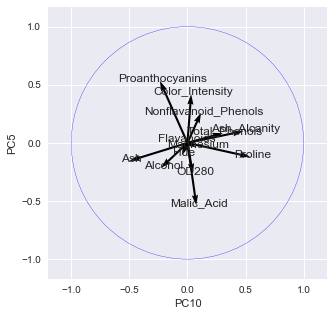

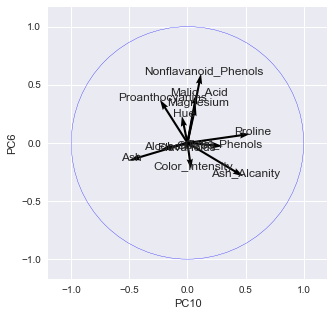

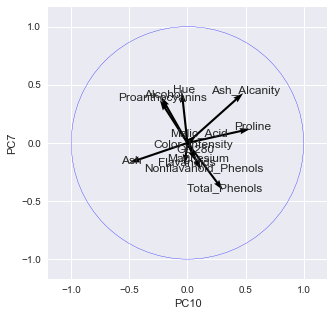

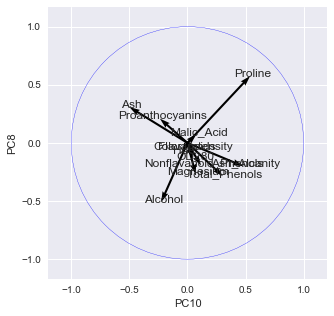

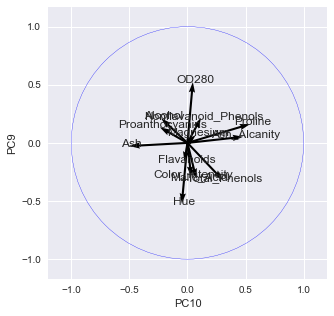

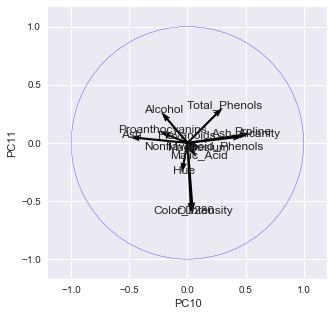

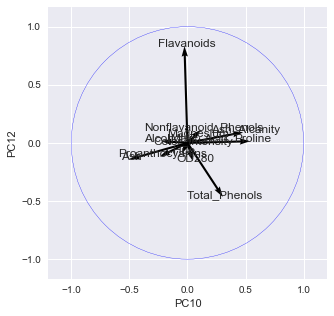

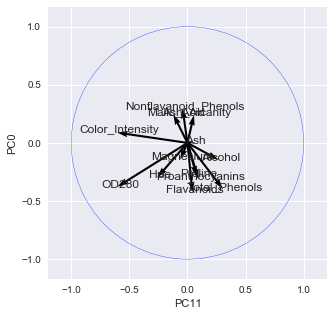

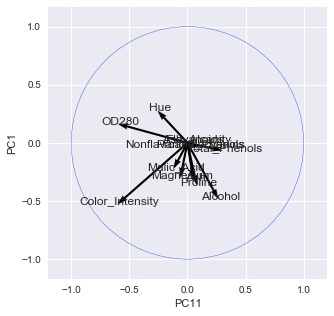

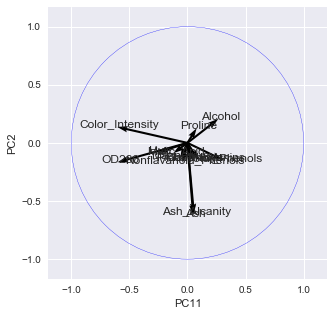

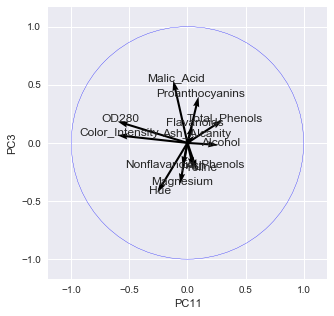

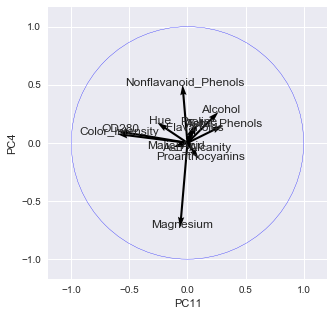

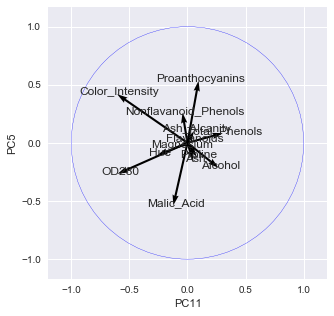

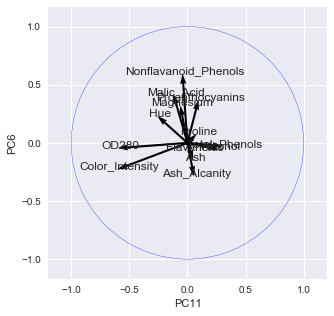

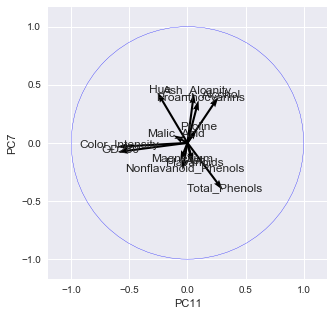

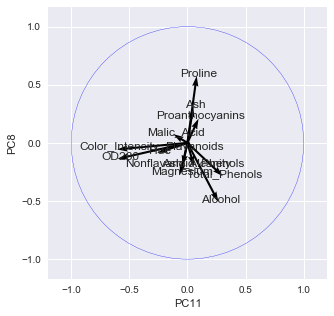

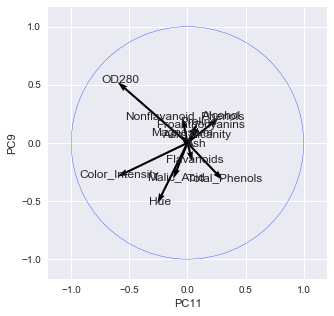

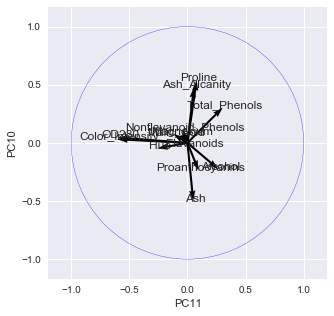

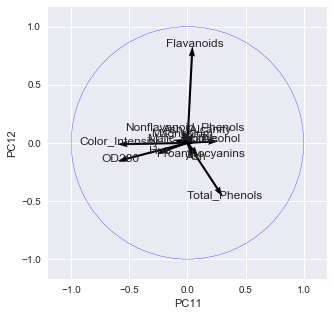

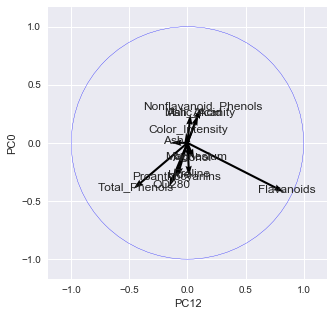

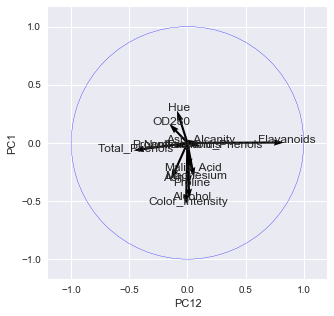

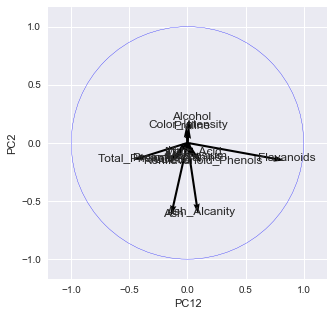

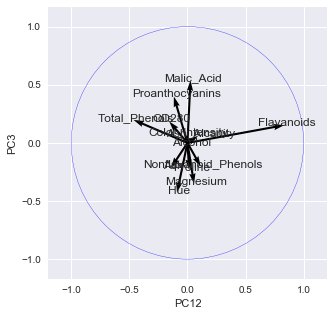

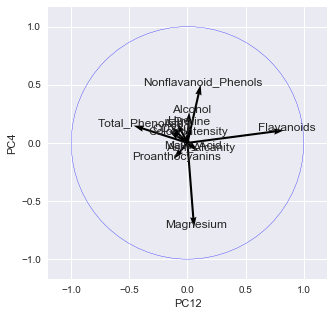

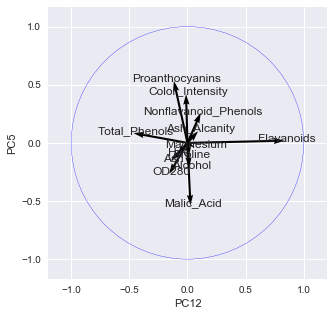

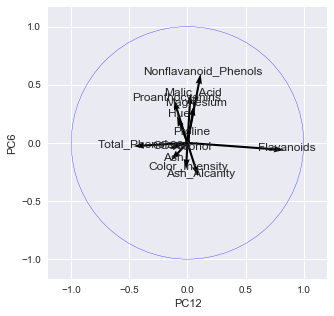

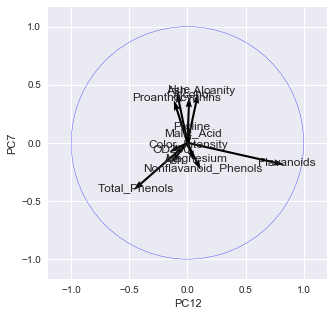

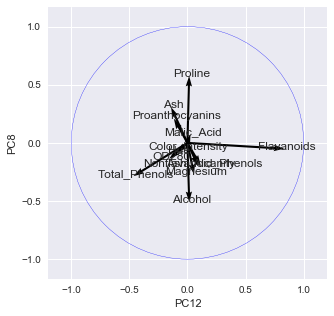

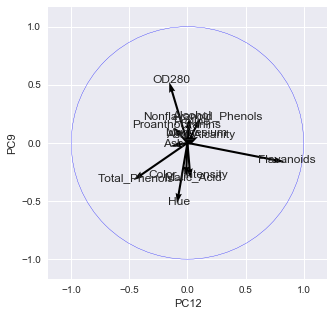

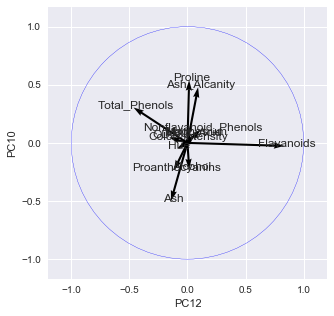

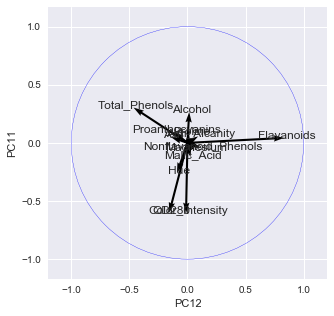

In [27]:
function(wine_properties)